## 0. 패키지 설치 및 라이브러리 임포트

In [65]:
!pip install koreanize-matplotlib

In [66]:
!pip install missingno

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

# 결측치 확인하는 라이브러리
import missingno as msno

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [68]:
train = pd.read_csv('../과제 데이터/train.csv', encoding='cp949')
df=train.copy()

df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    6309 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

## 1. 결측치

### 1-1. 결측치 유무 확인

In [70]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      699
Holiday                        0
Functioning Day                0
dtype: int64

<Axes: >

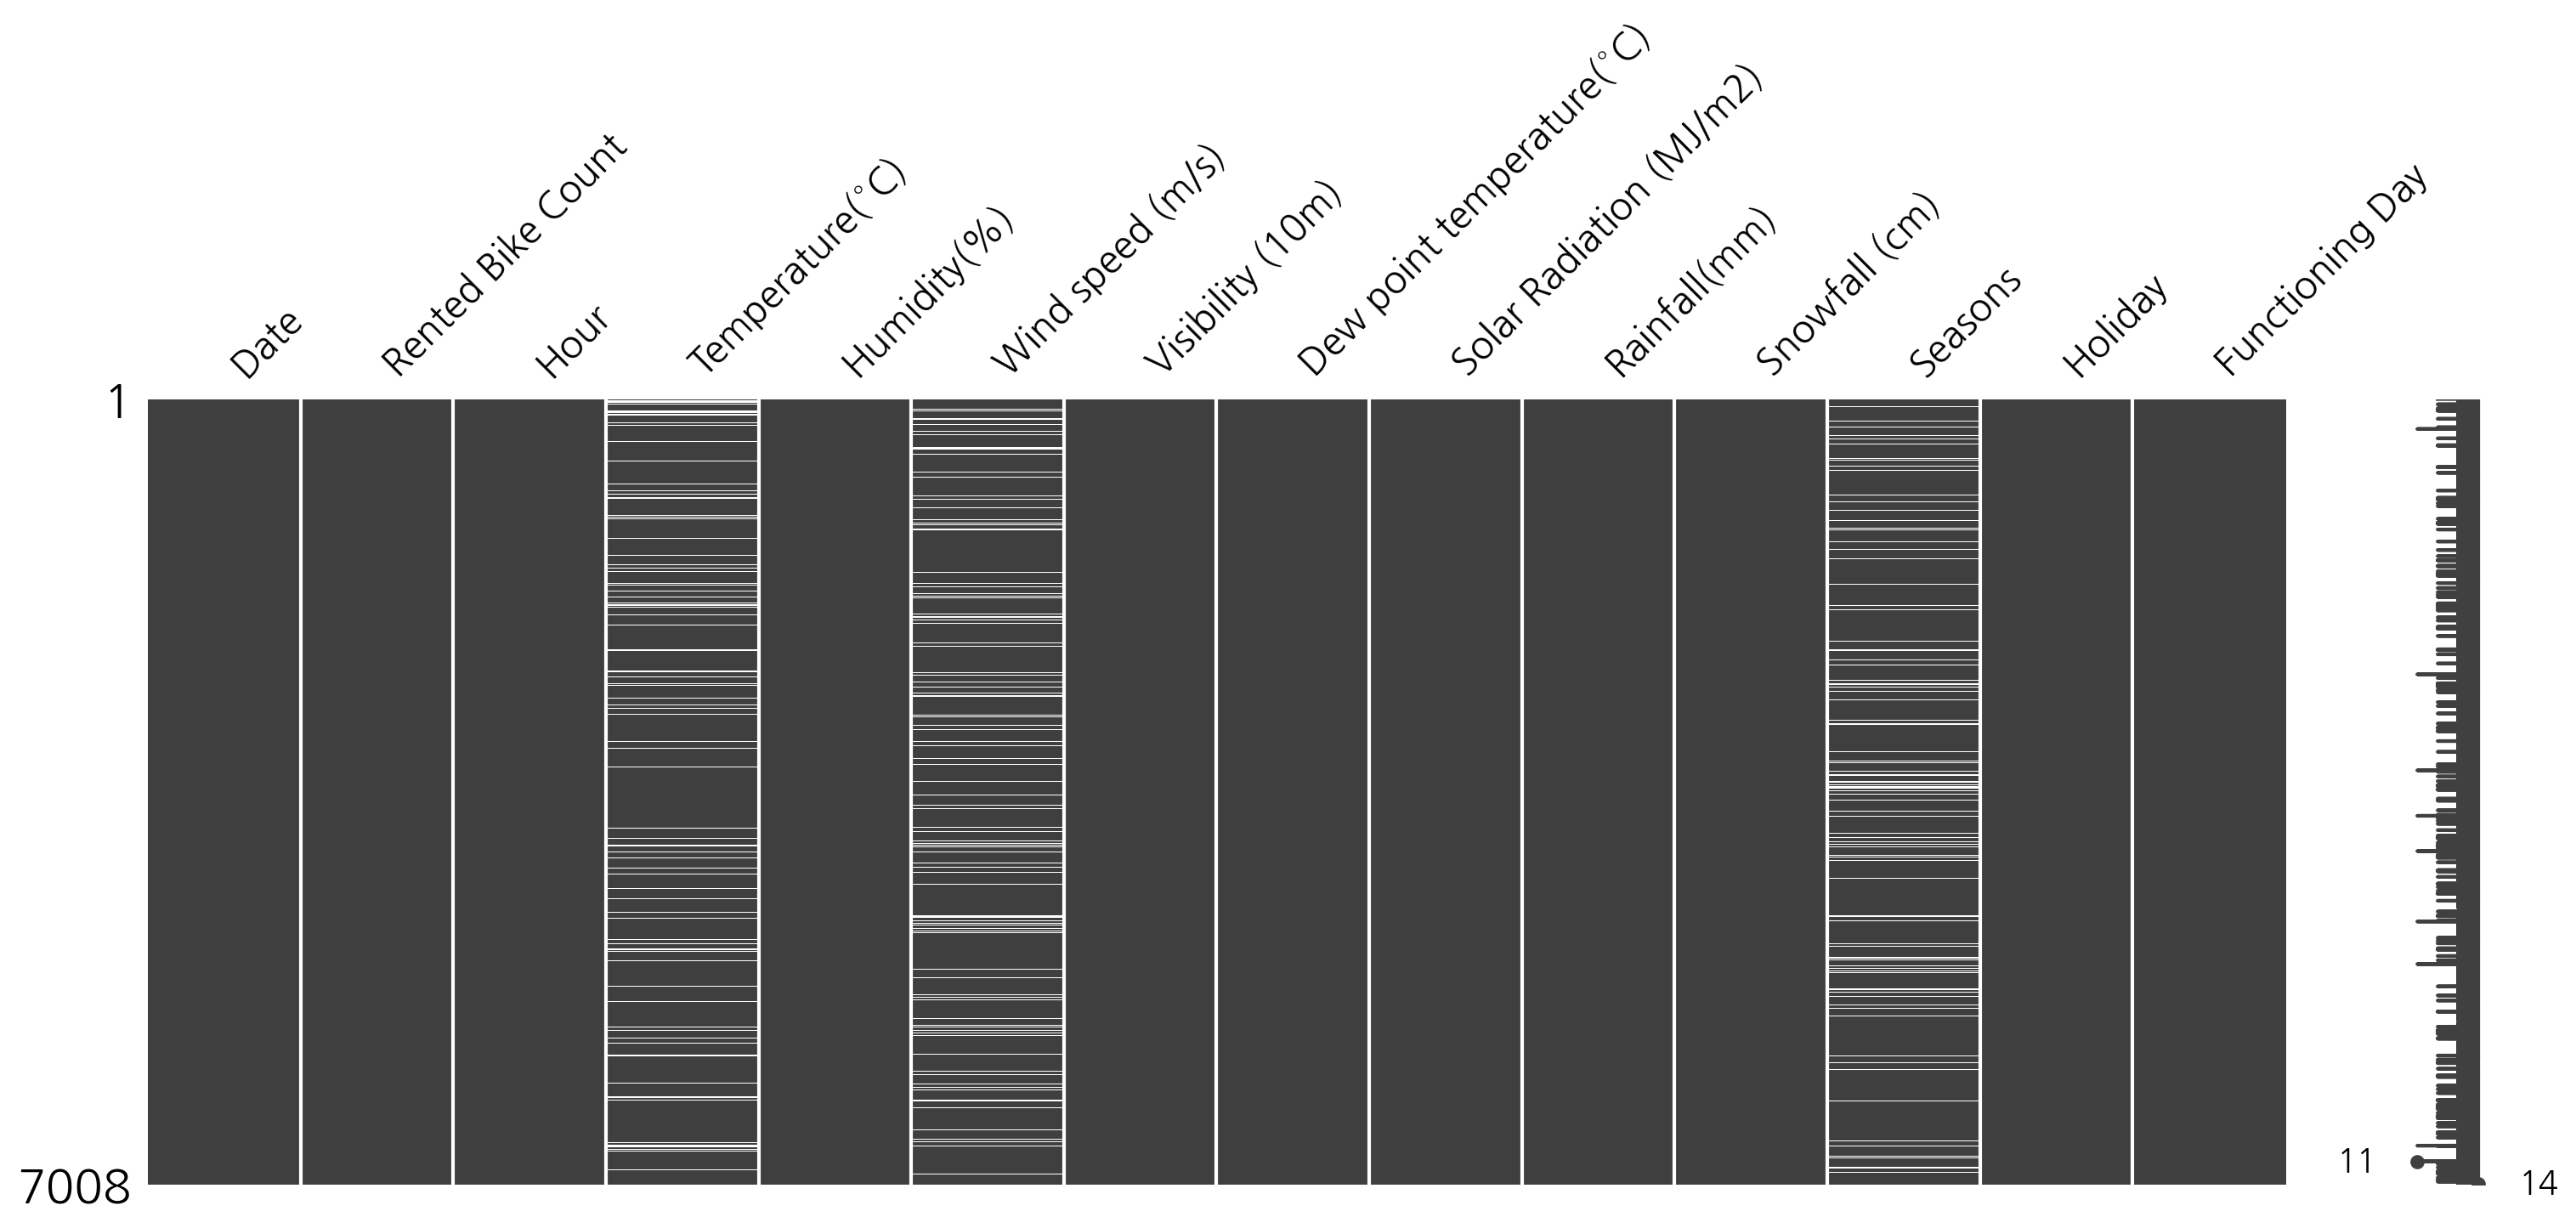

In [71]:
msno.matrix(df, figsize=(18,6))

> 결측치가 만약 한 행에 하나씩만 있다면, 대체가 용이해질 것이라고 생각

각 행의 결측치 개수를 알아본다

In [72]:
# 각 행의 결측치 개수 계산
nan_counts = df.isnull().sum(axis=1)

# 결측치가 1개인 행의 개수 계산
num_rows_nan1 = (nan_counts == 1).sum()

# 결측치가 2개인 행의 개수 계산
num_rows_nan2 = (nan_counts == 2).sum()

# 결측치가 3개인 행의 개수 계산
num_rows_nan3 = (nan_counts == 3).sum()

# 결과 출력
print(f"결측치가 1개인 행의 개수: {num_rows_nan1}")
print(f"결측치가 2개인 행의 개수: {num_rows_nan2}")
print(f"결측치가 3개인 행의 개수: {num_rows_nan3}")


결측치가 1개인 행의 개수: 1727
결측치가 2개인 행의 개수: 176
결측치가 3개인 행의 개수: 9


① 대부분 결측치를 1개만 가지고있다.

② 계절은 날짜를 이용해 직관적으로 결측치를 처리할 수 있으므로 계절의 결측치를 먼저 채운 후, 
각 행의 결측치 개수를 다시 확인하고 온도와 풍속의 결측치를 처리한다.

③ 온도와 풍속은 날씨에 관련된 속성(계절, 날짜, 강수량 등)에 관련이 있을것이므로 이것과의 상관관계를 본 후 결측치를 채우도록 한다.

### 1-2. 계절의 결측치 처리

> Date의 month를 기준으로 계절을 판단한다

In [73]:
df['month'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['month'] = df['month'].dt.month
df.groupby('month')['Seasons'].value_counts(dropna=False)

month  Seasons
1      Winter     543
       NaN         73
2      Winter     496
       NaN         44
3      Spring     523
       NaN         47
4      Spring     507
       NaN         63
5      Spring     524
       NaN         63
6      Summer     522
       NaN         62
7      Summer     553
       NaN         55
8      Summer     523
       NaN         56
9      Autumn     520
       NaN         59
10     Autumn     540
       NaN         59
11     Autumn     527
       NaN         55
12     Winter     531
       NaN         63
Name: count, dtype: int64

In [74]:
# 월별 계절 매핑 딕셔너리 생성
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

# 'month' 열을 기준으로 계절을 매핑하여 결측치 채우기
df['Seasons'] = df.apply(lambda row: season_mapping.get(row['month'], np.nan) if pd.isna(row['Seasons']) else row['Seasons'], axis=1)

# 결측이 남아있는지 확인
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
month                          0
dtype: int64

In [77]:
# 각 행의 결측치 개수 계산
nan_counts = df.isnull().sum(axis=1)

# 결측치가 1개인 행의 개수 계산
num_rows_nan1 = (nan_counts == 1).sum()

# 결측치가 2개인 행의 개수 계산
num_rows_nan2 = (nan_counts == 2).sum()

# 결측치가 3개인 행의 개수 계산
num_rows_nan3 = (nan_counts == 3).sum()

# 결과 출력
print(f"결측치가 1개인 행의 개수: {num_rows_nan1}")
print(f"결측치가 2개인 행의 개수: {num_rows_nan2}")
print(f"결측치가 3개인 행의 개수: {num_rows_nan3}")


결측치가 1개인 행의 개수: 1261
결측치가 2개인 행의 개수: 73
결측치가 3개인 행의 개수: 0


### 1-3. 온도의 결측치 처리

Text(0.5, 1.0, '결측치를 제외한 온도의 히스토그램')

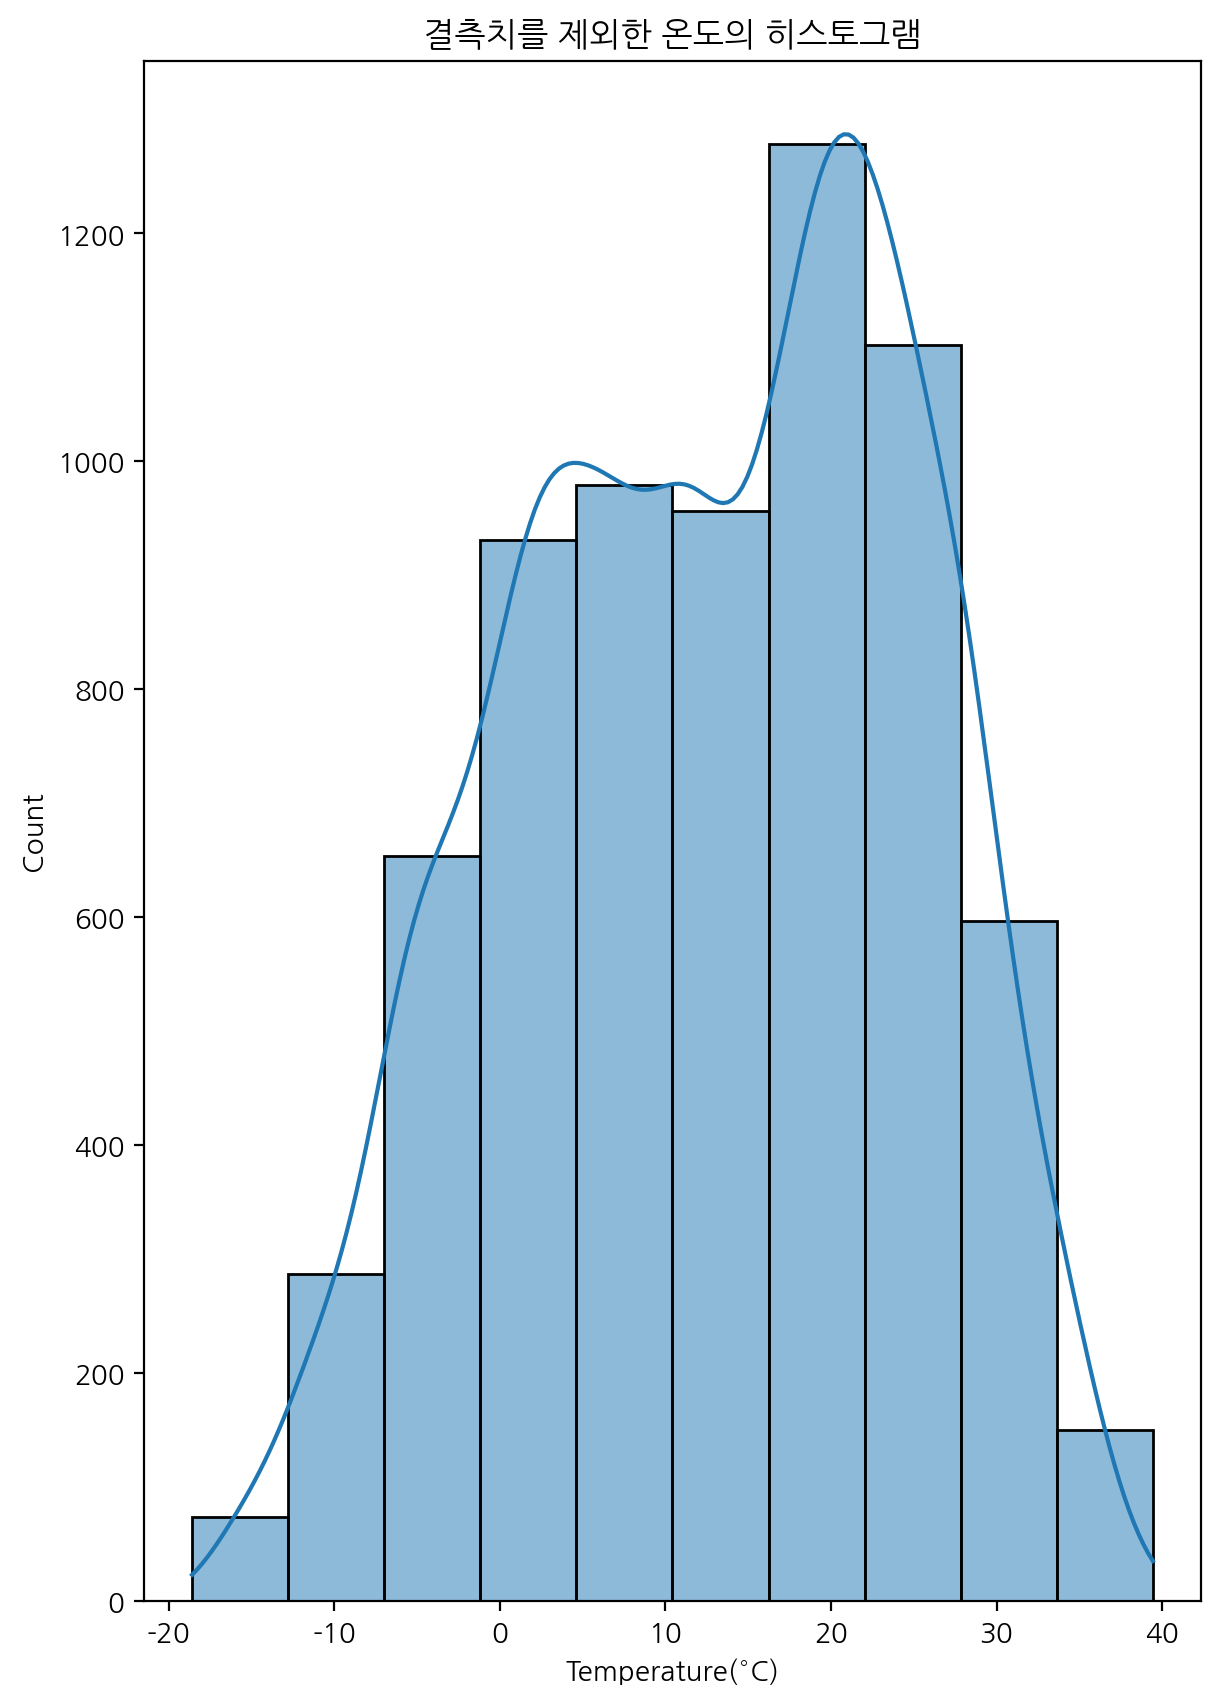

In [94]:
temp = df['Temperature(°C)'].dropna()

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.histplot(temp, bins=10, kde=True)
plt.title('결측치를 제외한 온도의 히스토그램')

- 온도 빈도의 분포를 겨울(min~5), 봄(5~15), 가을(10~20), 여름(20~max) 순으로 잘라서 봤을 때, 계절의 frequency는 거의 비슷할 것이라고 예측된다. 

- 근소한 차이가 있다면 여름>가을>겨울>봄 일 것이다.

- 만약 예측과 같이 계절의 frequency가 나온다면, 온도의 결측치는 계절의 평균 또는 중앙값으로 대체해도 무관할 것이다. 이때 시간대도 함께 고려하여 결측치를 채우도록 한다.

In [85]:
# 'Seasons' 열에서 결측치가 있는 행을 제외
no_nan_Seasons = df[df['Seasons'].notna()]

# 'Seasons' 열의 값별로 행의 개수를 계산
season_counts = no_nan_Seasons['Seasons'].value_counts()

# 결과 출력
print(season_counts)

Seasons
Summer    1771
Autumn    1760
Winter    1750
Spring    1727
Name: count, dtype: int64


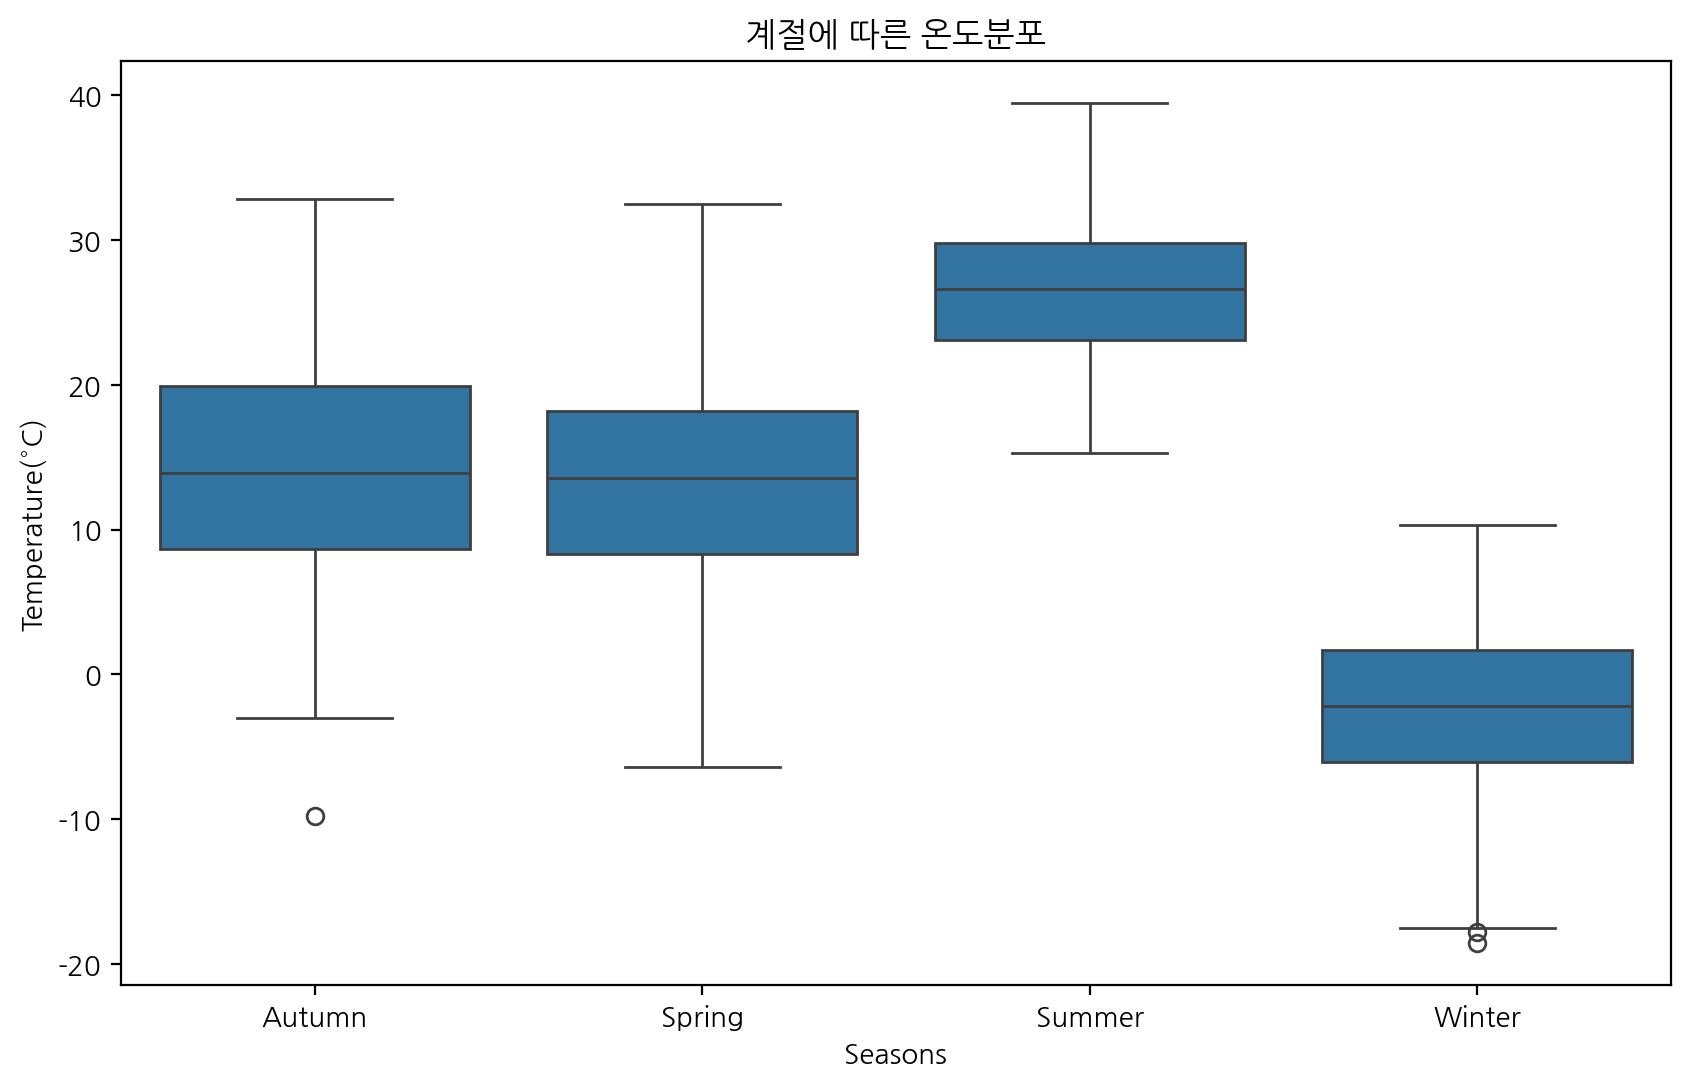

In [90]:
# 계절과 시간을 기준으로 온도 결측치를 채우도록 함수 설계

def fill_nan_temperature(row, stats_by_season_hour):
    if pd.isna(row['Temperature(°C)']):
        season = row['Seasons']
        hour = row['Hour']
        mean_temperature = stats_by_season_hour.loc[(season, hour), 'mean']
        std_deviation = stats_by_season_hour.loc[(season, hour), 'std']
        return np.random.normal(loc=mean_temperature, scale=std_deviation)
    else:
        return row['Temperature(°C)']

def fill_nan_temperatures(dataframe):
    # 계절과 시간대별 평균 및 표준편차 계산
    stats_by_season_hour = dataframe.groupby(['Seasons', 'Hour'])['Temperature(°C)'].agg(['mean', 'std'])
    
    # apply 메서드를 사용하여 결측값 채우기
    dataframe['Temperature(°C)'] = dataframe.apply(lambda row: impute_missing_temperature(row, stats_by_season_hour), axis=1)

# 데이터프레임에 결측값 채우기
fill_nan_temperatures(df)

# 온도 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Temperature(°C)', data=df)
plt.title('계절에 따른 온도분포')
plt.xlabel('Seasons')
plt.ylabel('Temperature(°C)')
plt.show()

### 1-4. 풍속의 결측치 처리

In [96]:
# 수치형 데이터만 선택
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 상관관계 매트릭스 계산
correlation_matrix = df_numeric.corr()

# 'Wind speed (m/s)'와 다른 변수 간의 상관관계 출력
wind_speed_correlation = correlation_matrix['Wind speed (m/s)'].sort_values(ascending=False)
print(wind_speed_correlation)

Wind speed (m/s)             1.000000
Solar Radiation (MJ/m2)      0.330813
Hour                         0.282618
Visibility (10m)             0.173654
Rented Bike Count            0.116835
Snowfall (cm)               -0.000302
Rainfall(mm)                -0.013948
Temperature(°C)             -0.039258
Dew point temperature(°C)   -0.186479
Humidity(%)                 -0.342188
Name: Wind speed (m/s), dtype: float64


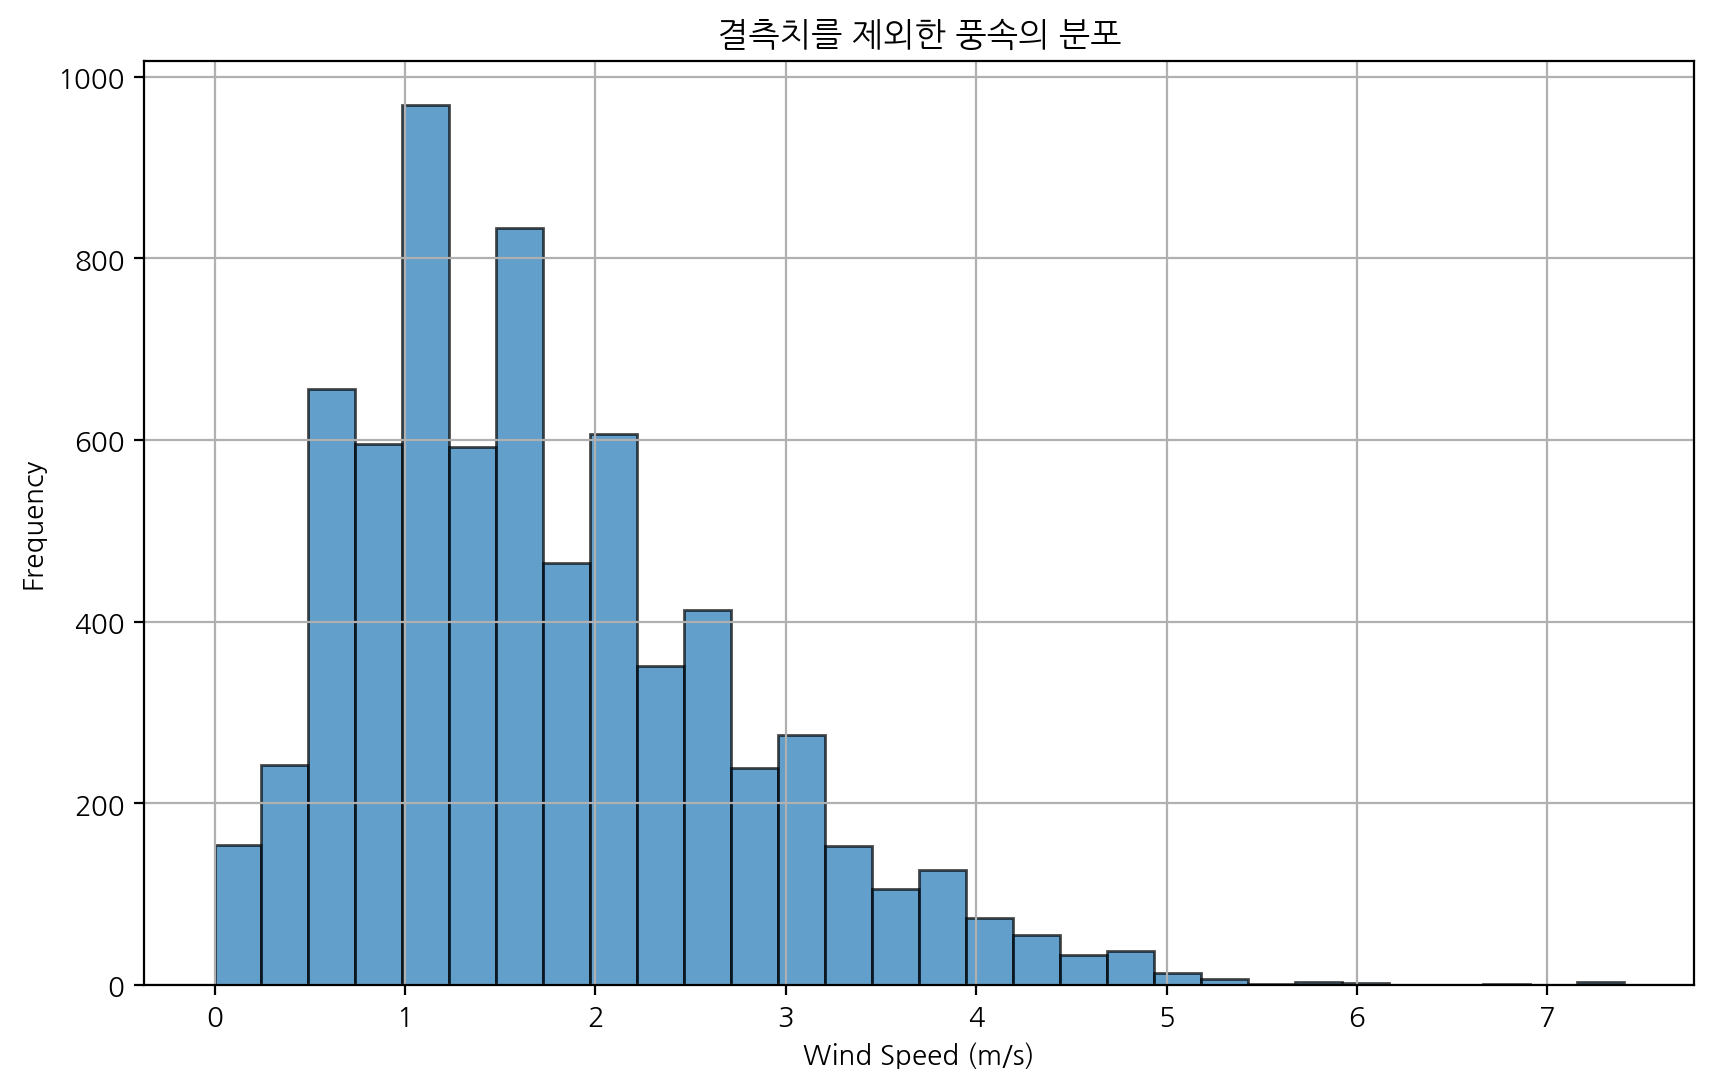

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(df['Wind speed (m/s)'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('결측치를 제외한 풍속의 분포')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- 가장 상관관계가 큰 변수들은 Humidity (%)와 Solar Radiation (MJ/m2)이다. 

- Humidity (%)는 음의 상관관계가, Solar Radiation (MJ/m2)는 양의 상관관계가 강하다. 이것을 이용하여 결측치를 채우도록 한다.

In [98]:
!pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.2/12.8 MB 3.9 MB/s eta 0:00:04
   - -------------------------------------- 0.5/12.8 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.8 MB 8.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.5/12.8 MB 8.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.9/12.8 MB 9.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/12.8 MB 9.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.7/12.8 MB 9.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.2/12.8 MB 9.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.8 MB 9.5 MB/s eta 0:00:01
   ------------- ----------------

In [129]:
# 수치형 데이터만 선택
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# KNN 임퓨테이션을 사용해 결측치를 채우기
features = ['Humidity(%)', 'Solar Radiation (MJ/m2)', 'Wind speed (m/s)']
X = df_numeric[features].values

# KNN 모델을 사용하여 결측치 채우기
knn_imputer = KNN(k=3)  # k는 가까운 이웃의 수
X_imputed = knn_imputer.fit_transform(X)

# 결과를 데이터프레임으로 변환
df_numeric_imputed = pd.DataFrame(X_imputed, columns=features)

# 원본 데이터프레임에 대체된 값 반영
df.update(df_numeric_imputed)

c:\Users\chica\anaconda3\Lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/7008 with 0 missing, elapsed time: 11.985
Imputing row 101/7008 with 0 missing, elapsed time: 11.999
Imputing row 201/7008 with 0 missing, elapsed time: 11.999
Imputing row 301/7008 with 0 missing, elapsed time: 11.999
Imputing row 401/7008 with 0 missing, elapsed time: 11.999
Imputing row 501/7008 with 0 missing, elapsed time: 11.999
Imputing row 601/7008 with 0 missing, elapsed time: 12.001
Imputing row 701/7008 with 0 missing, elapsed time: 12.001
Imputing row 801/7008 with 0 missing, elapsed time: 12.001
Imputing row 901/7008 with 0 missing, elapsed time: 12.001
Imputing row 1001/7008 with 0 missing, elapsed time: 12.001
Imputing row 1101/7008 with 0 missing, elapsed time: 12.001
Imputing row 1201/7008 with 0 missing, elapsed time: 12.001
Imputing row 1301/7008 with 0 missing, elapsed time: 12.001
Imputing row 1401/7008 with 0 missing, elapsed time: 12.001
Imputing row 1501/7008 with 0 missing, elapsed time: 12.001
Imputing row 1601/7008 with 0 missing, elapsed time:

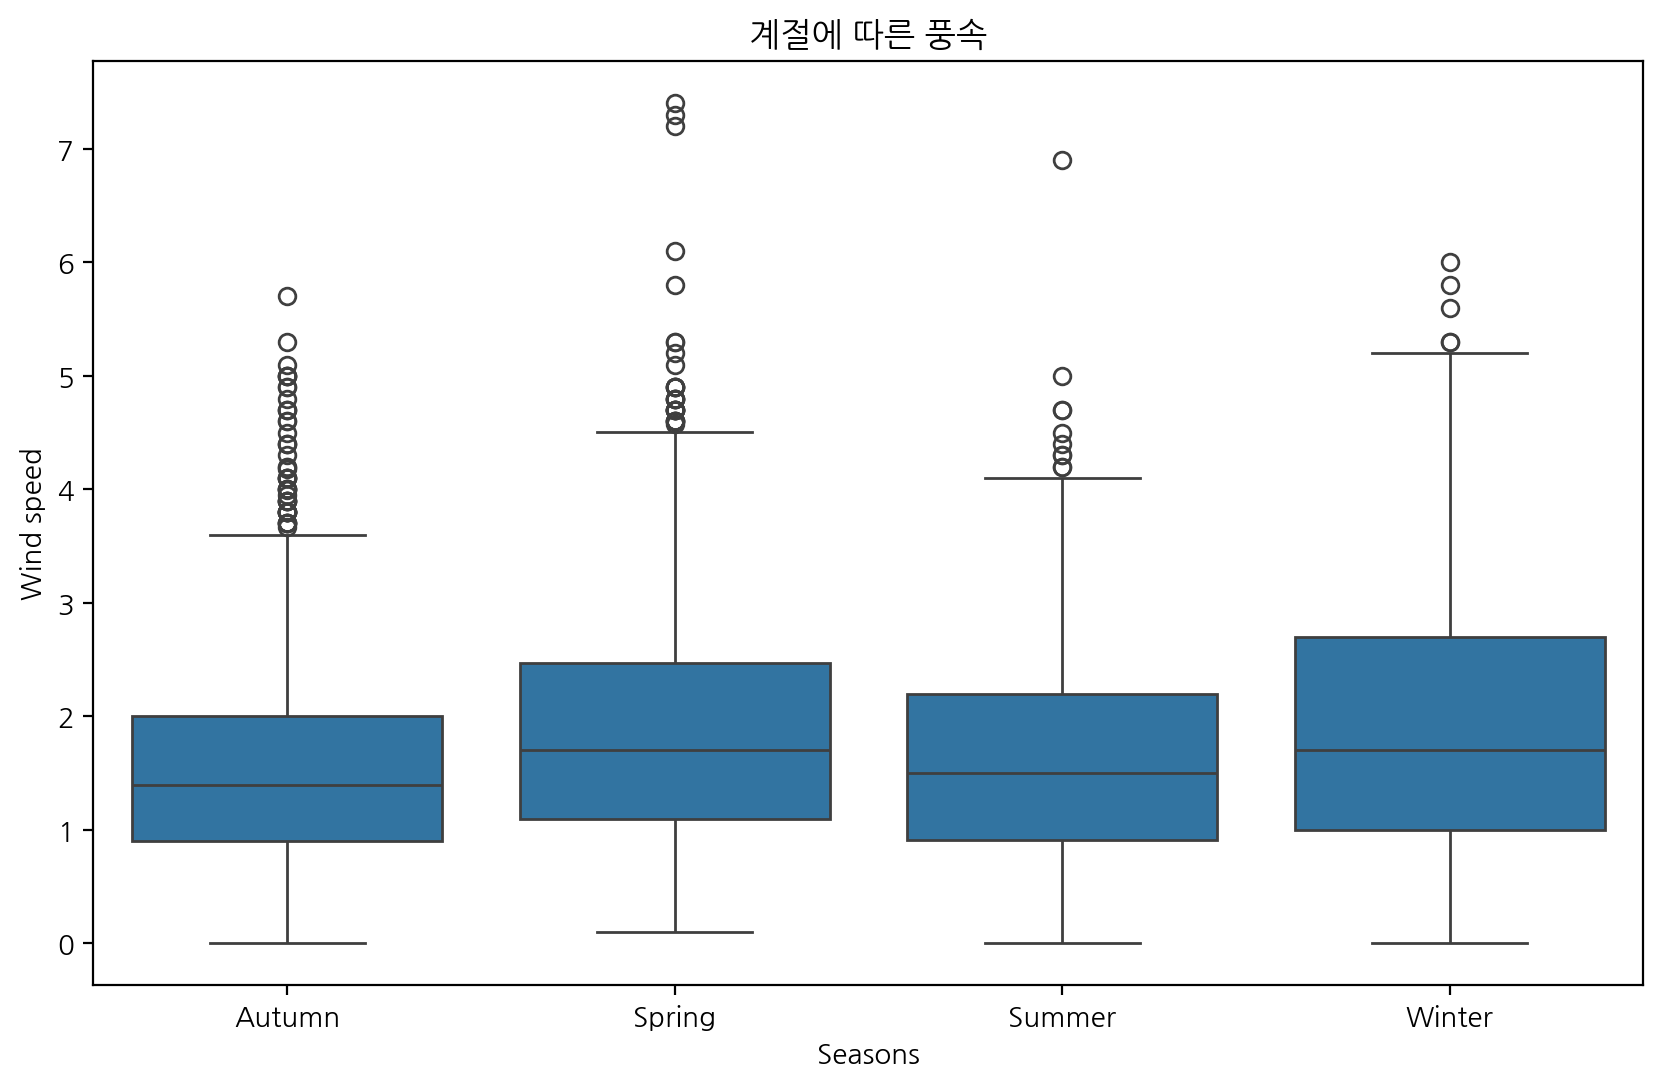

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Wind speed (m/s)', data=df)
plt.title('계절에 따른 풍속')
plt.xlabel('Seasons')
plt.ylabel('Wind speed')
plt.show()

기상청의 자료를 보면 계절별 평균적인 풍속은 다음과 같다.

봄: 1중반~3초반

여름: 1초반~2중반

가을: 1초반~2후반

겨울: 1중반~3중반

IQR은 평균 풍속과 비슷하게 나타났지만 이상치가 꽤 넓은 범위에 존재하고, 특히 가을같은 경우에는 이상치의 개수가 상당히 많다.

In [157]:
from scipy import stats

# Z-Score 계산
z_scores = stats.zscore(df['Wind speed (m/s)'])

# Z-Score의 절대값이 3을 초과하는 경우 이상치로 간주
outliers_z = df[abs(z_scores) > 3]

print(outliers_z)

            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
18    10/04/2018                133    21        17.472267         70.0   
229   09/11/2018                  0    13        14.000000         46.0   
301   01/03/2018                191    10         0.100000         53.0   
481   26/12/2017                250    11        -2.100000         28.0   
510   10/04/2018                913    14        21.200000         35.0   
802   07/04/2018                553    11         4.700000         26.0   
1101  01/03/2018                460    16         1.400000         33.0   
1256  24/01/2018                140    13       -12.000000         25.0   
1713  10/01/2018                193    15        -5.300000         33.0   
1817  01/03/2018                423    17         0.400000         37.0   
1989  05/09/2018               1131    15        28.100000         43.0   
2171  10/04/2018               1153    19        19.200000         55.0   
2277  04/12/2017         

풍속은 폭풍, 강우 등과 같이 변화를 주는 요인이 다수 존재하므로 이상치를 제거하거나 다른 값으로 대체하기에는 무리가 있어보인다. 따라서 현재 이상치는 존재할 수 있을만한 값으로 남겨두도록 한다.

## 3. 파생변수

### 3-1. 시간대별 자전거 대여 수 패턴 분석

시간을 morning, afternoon, evening, night 라는 4가지 범주로 나누어 어떤 시간대에 자전거 대여수가 가장 많은지 분석한다.

계절에 따라 시간대별 대여수가 달라질 수 있다고 예상되어 함께 분석한다.

In [132]:
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['Hour'].apply(categorize_hour)


C:\Users\chica\AppData\Local\Temp\ipykernel_23544\1237811778.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time of Day', y='Rented Bike Count', data=time_of_day_stats, palette='viridis')


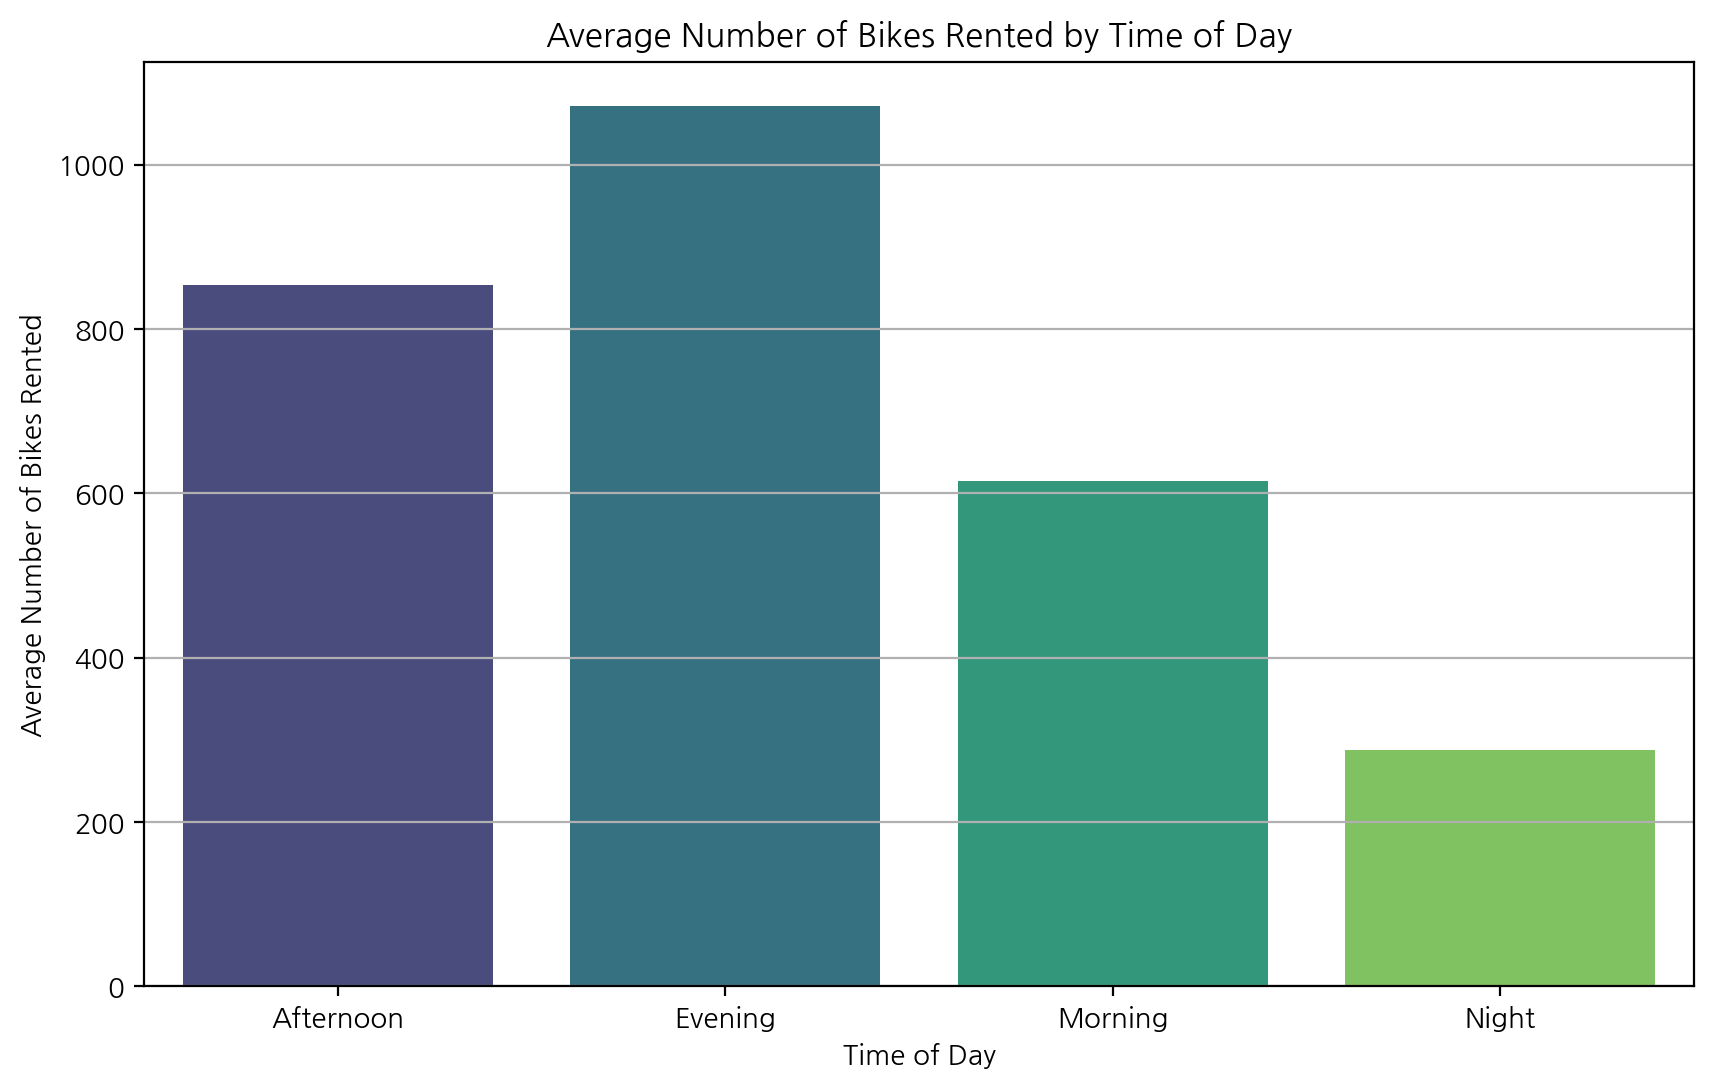

In [133]:
# 시간대별 평균 자전거 대여 수 계산
time_of_day_stats = df.groupby('Time of Day')['Rented Bike Count'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Time of Day', y='Rented Bike Count', data=time_of_day_stats, palette='viridis')
plt.title('Average Number of Bikes Rented by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Bikes Rented')
plt.grid(axis='y')
plt.show()

평균적으로 afternoon, evening에 가장 대여가 많이된다.

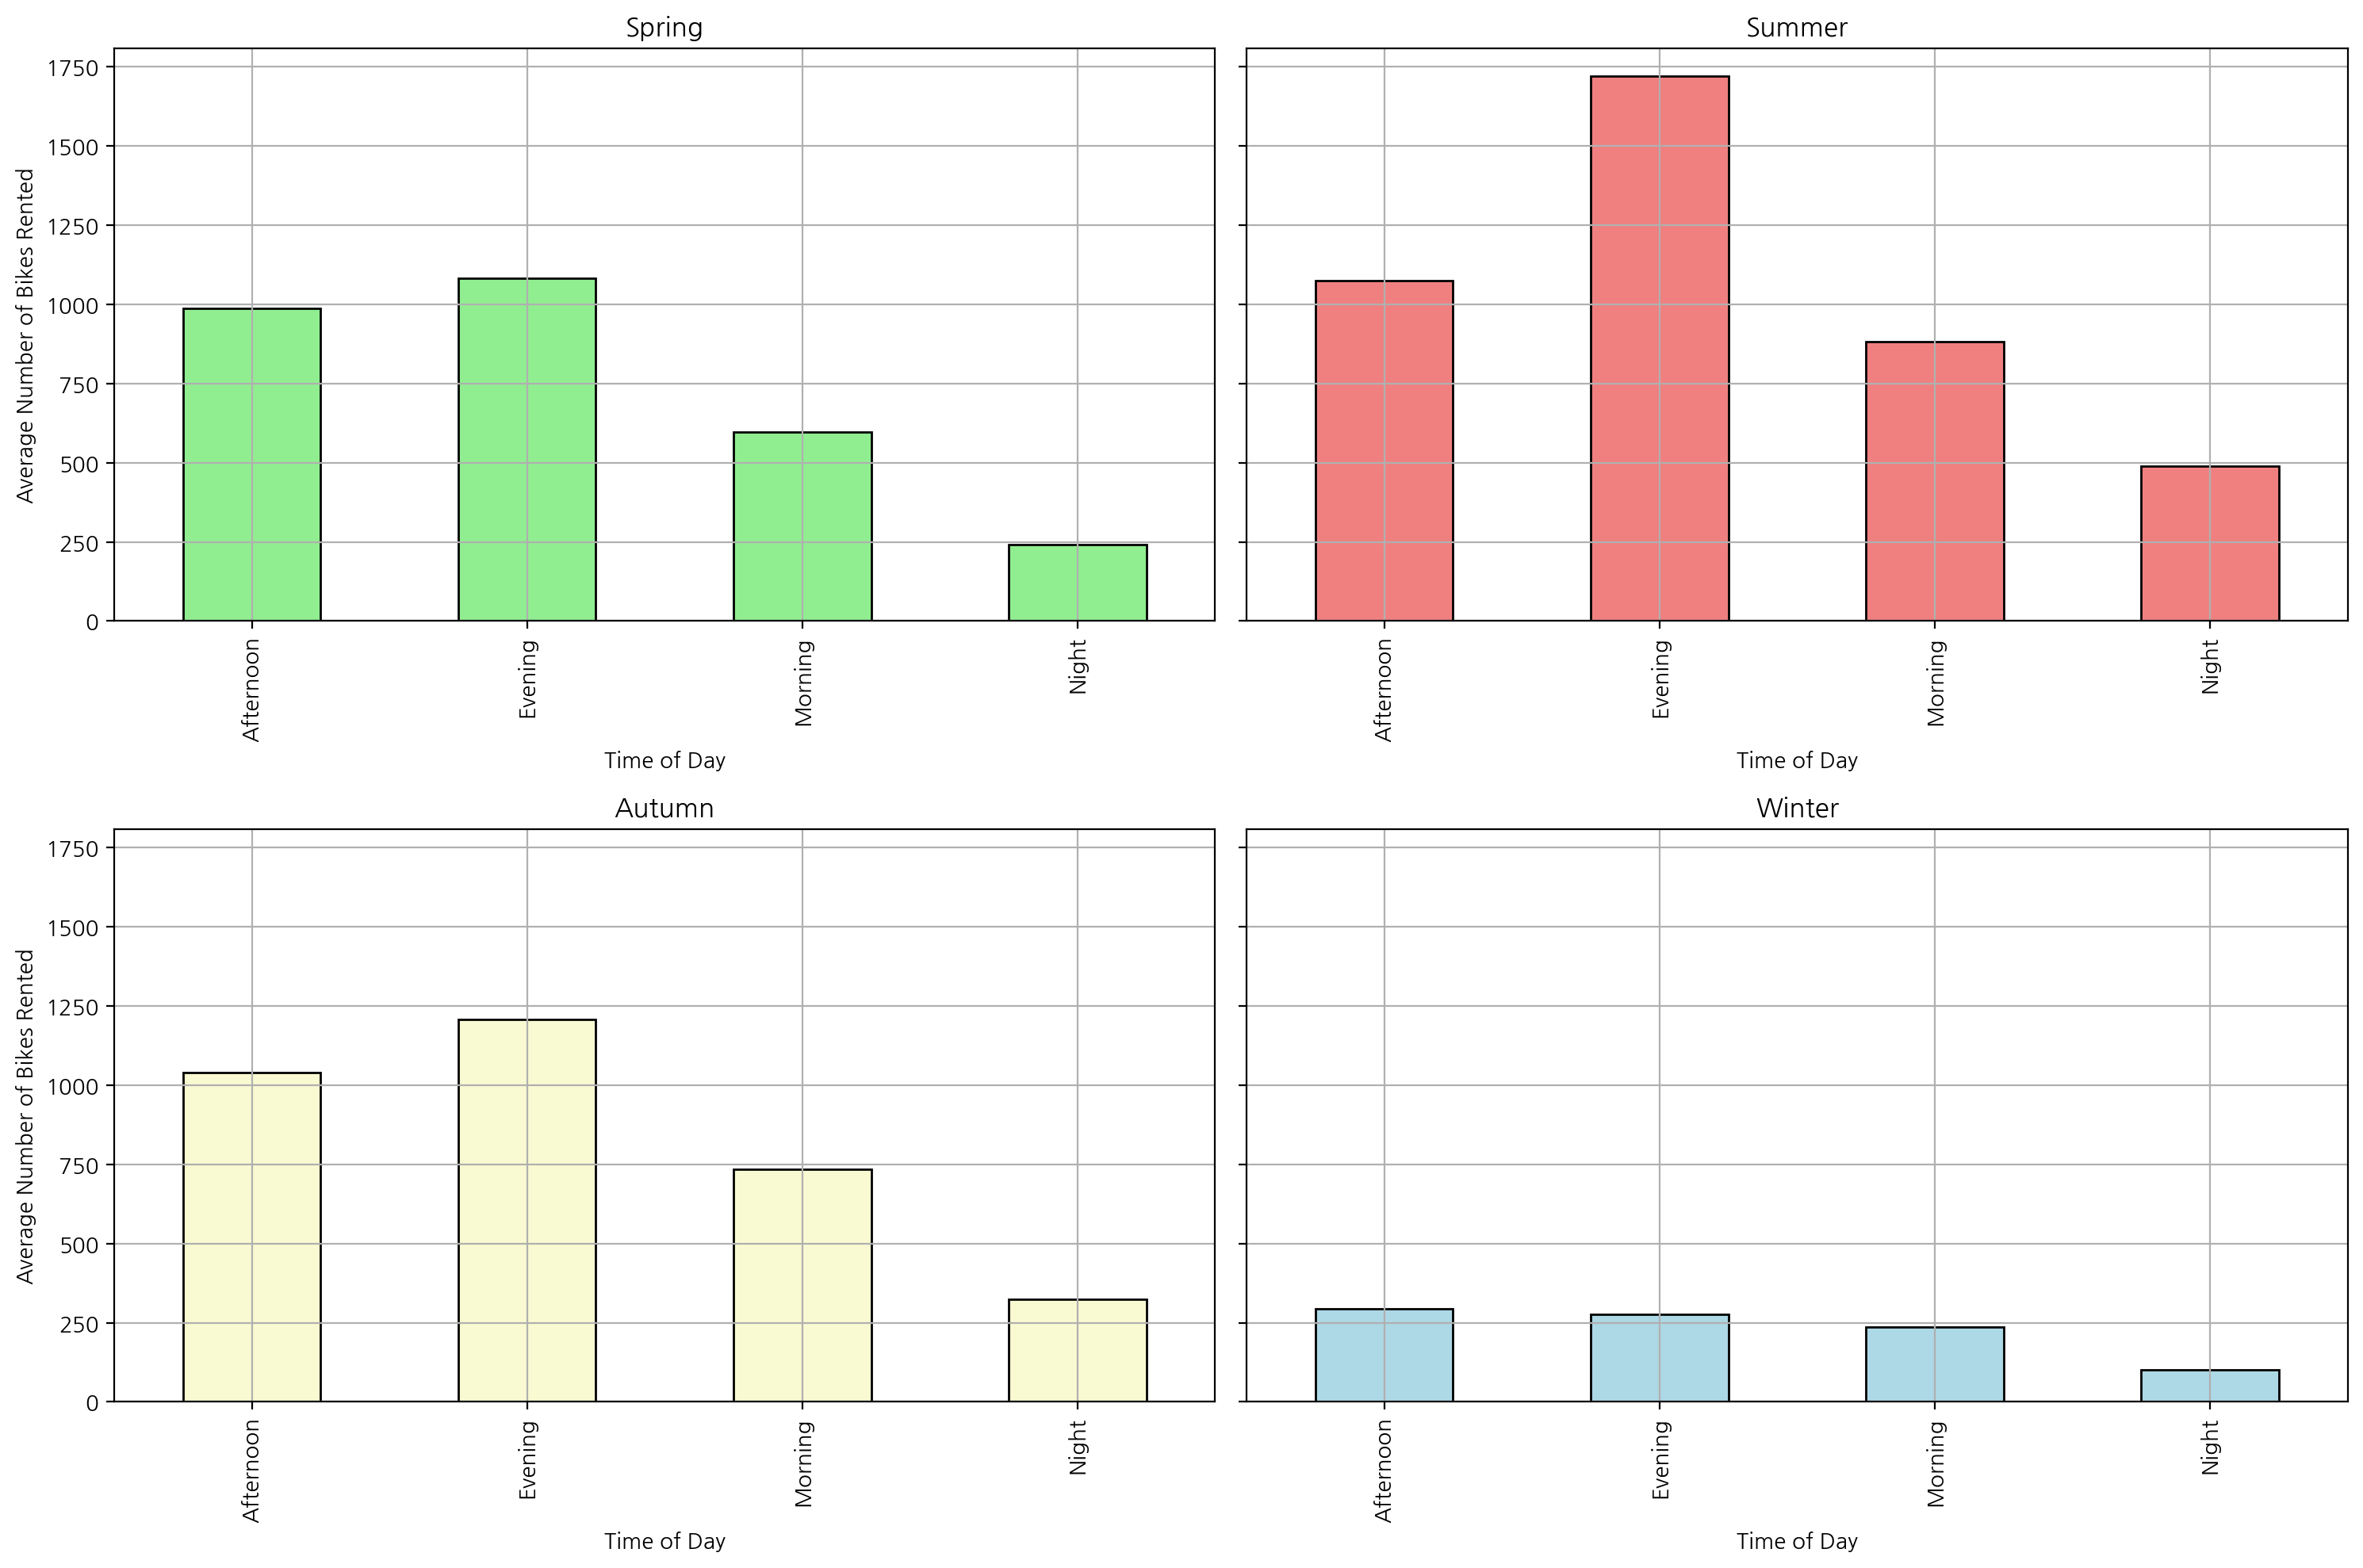

In [134]:
# 계절별 시간대별 자전거 대여량 평균 계산
season_time_stats = df.groupby(['Seasons', 'Time of Day'])['Rented Bike Count'].mean().unstack()

# 서브플롯으로 계절별 시간대 대여량을 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
colors = ['lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'lightblue']

for i, season in enumerate(seasons):
    ax = axes[i // 2, i % 2]
    season_time_stats.loc[season].plot(kind='bar', ax=ax, color=colors[i], edgecolor='black')
    ax.set_title(f'{season}')
    ax.set_xlabel('Time of Day')
    ax.set_ylabel('Average Number of Bikes Rented')
    ax.grid(True)

plt.tight_layout()
plt.show()


계절별로 나누어 보았을 때에도 시간대별 대여량의 순위는 비슷하다.

여름에서 더욱 뚜렷한 대여량 차이가 나타났고, 겨울에서는 시간대에 상관없이 대여율이 저조하다.

### 3-2. 날씨가 대여량에 미치는 영향 분석

체감온도 공식을 이용하여 날씨가 대여량에 미치는 영향을 분석한다.

In [141]:
# 체감 온도 공식
df['Feels Like Temperature'] = df['Temperature(°C)'] - (0.7 * df['Humidity(%)'] / 100) * 15


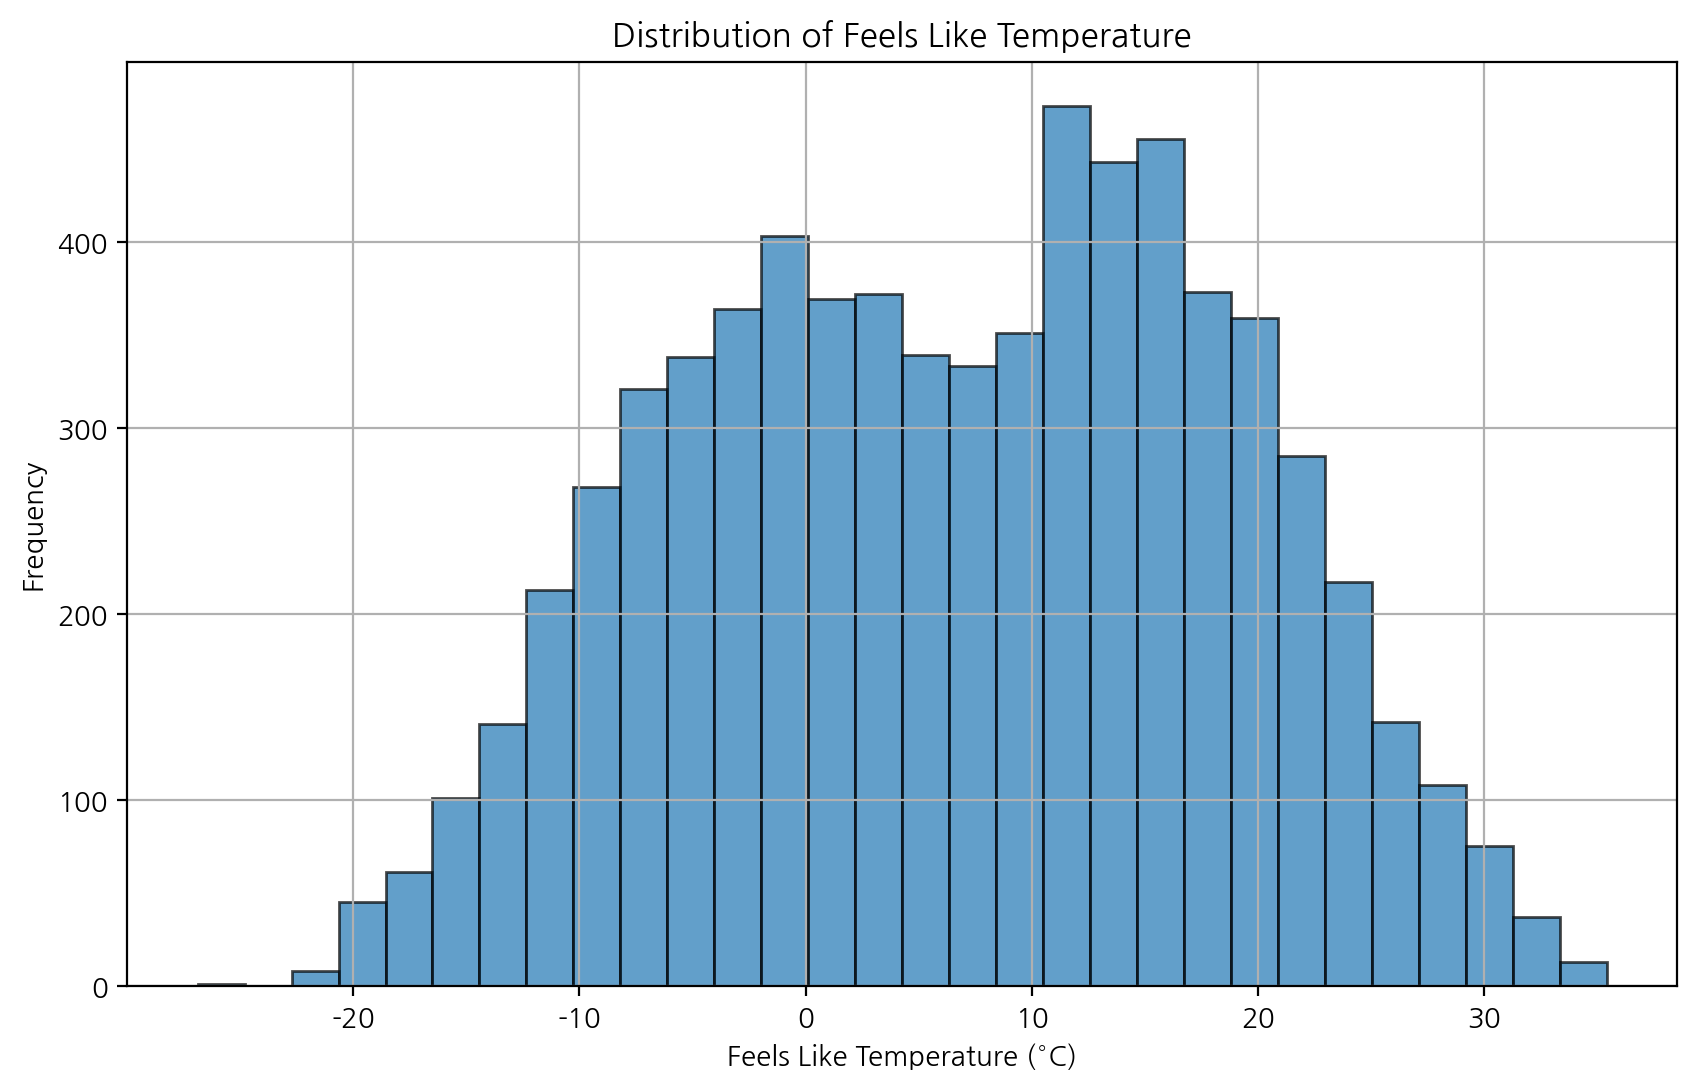

In [137]:
plt.figure(figsize=(10, 6))
plt.hist(df['Feels Like Temperature'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Feels Like Temperature')
plt.xlabel('Feels Like Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


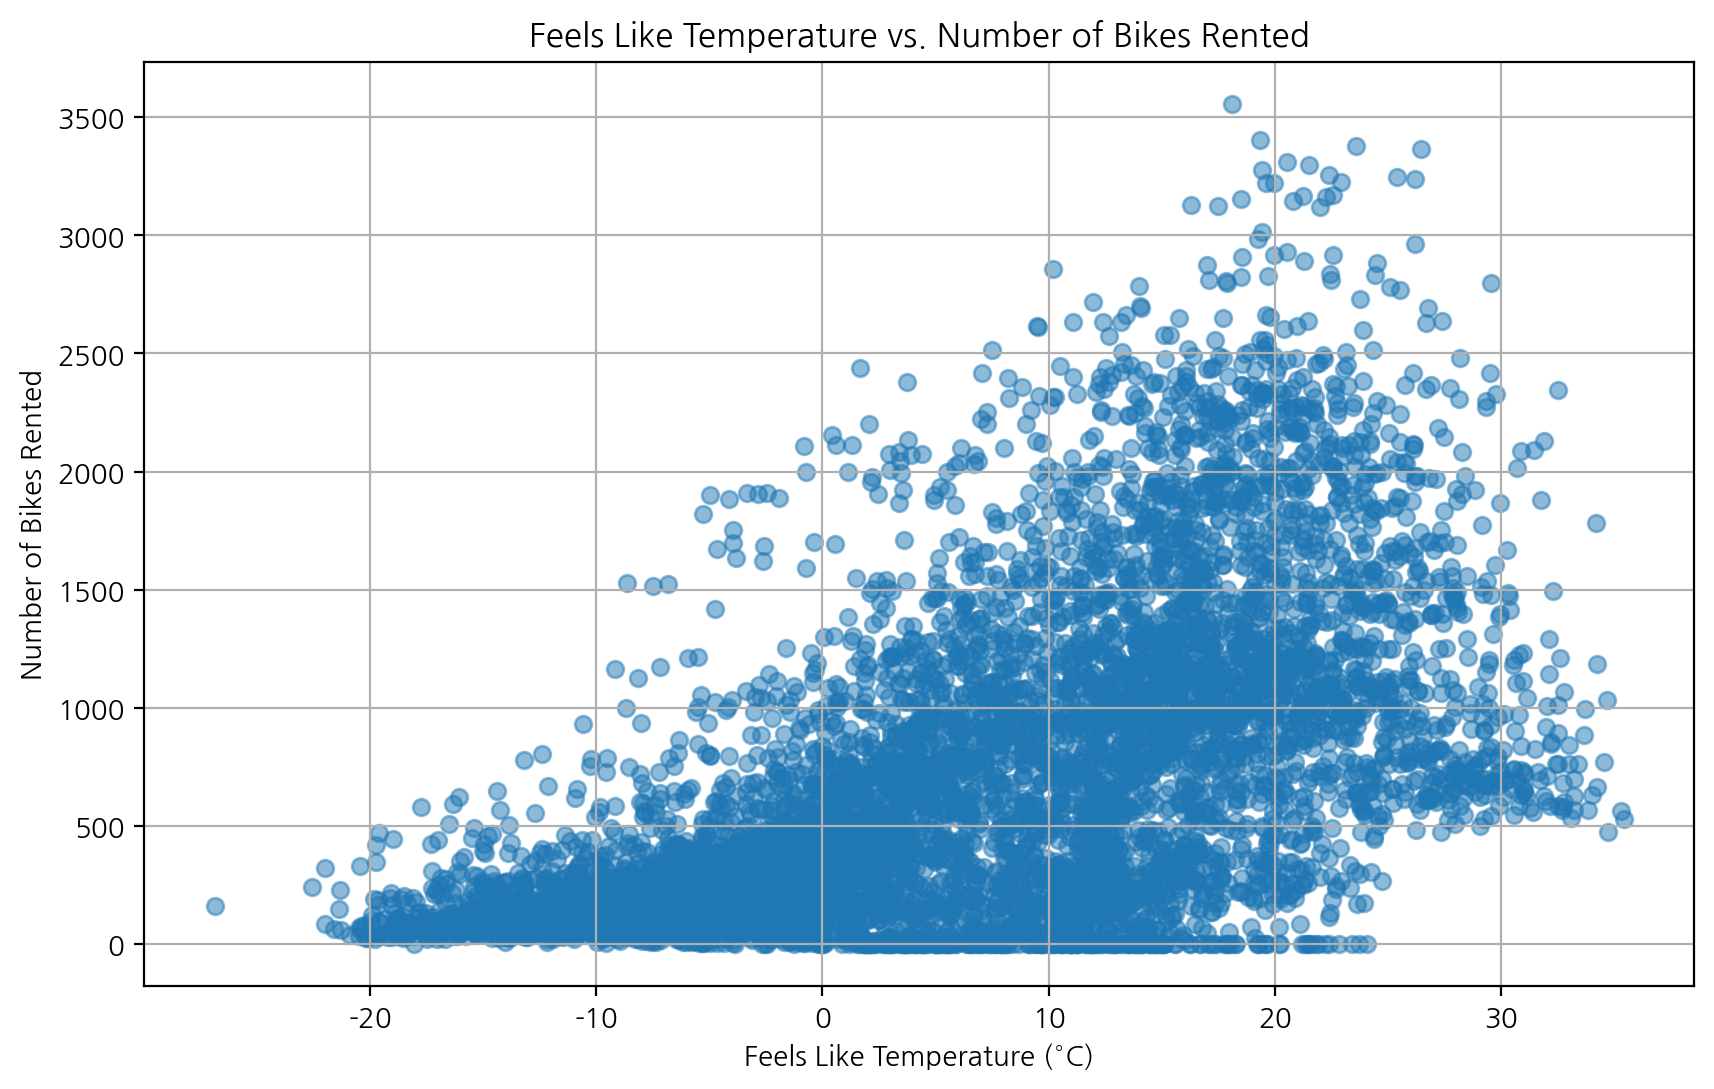

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Feels Like Temperature'], df['Rented Bike Count'], alpha=0.5)
plt.title('Feels Like Temperature vs. Number of Bikes Rented')
plt.xlabel('Feels Like Temperature (°C)')
plt.ylabel('Number of Bikes Rented')
plt.grid(True)
plt.show()


체감온도가 10도~20도일때, 그리고 체감온도가 낮을때 보단 높을때 대여량이 많다.

이는 3-1과 연관지어 생각해보았을때, 겨울에 체감온도를 올려줄 수 있을만한 방안이 마련된다면 대여량 증가에 긍정적인 영향을 줄 수 있을거라고 예상된다. 예를들어 겨울용 따땃한 안장이 설치된 자전거를 대여하는 방식이 있다.

### 3-3. 하루 중 자전거 대여량의 피크 시간대

In [144]:
# 체감 온도와 강수량의 결합 지수
df['Feels Like Temperature and Rainfall Index'] = df['Feels Like Temperature'] - (df['Rainfall(mm)'] * 2)


In [145]:
# 시간별 자전거 대여량 평균 계산
hourly_rentals = df.groupby('Hour')['Rented Bike Count'].mean()

# 피크 시간 계산
peak_hour = hourly_rentals.idxmax()
peak_hour_value = hourly_rentals.max()

print(f"피크 시간: {peak_hour}:00, 피크 대여량: {peak_hour_value}")

피크 시간: 18:00, 피크 대여량: 1499.1575342465753


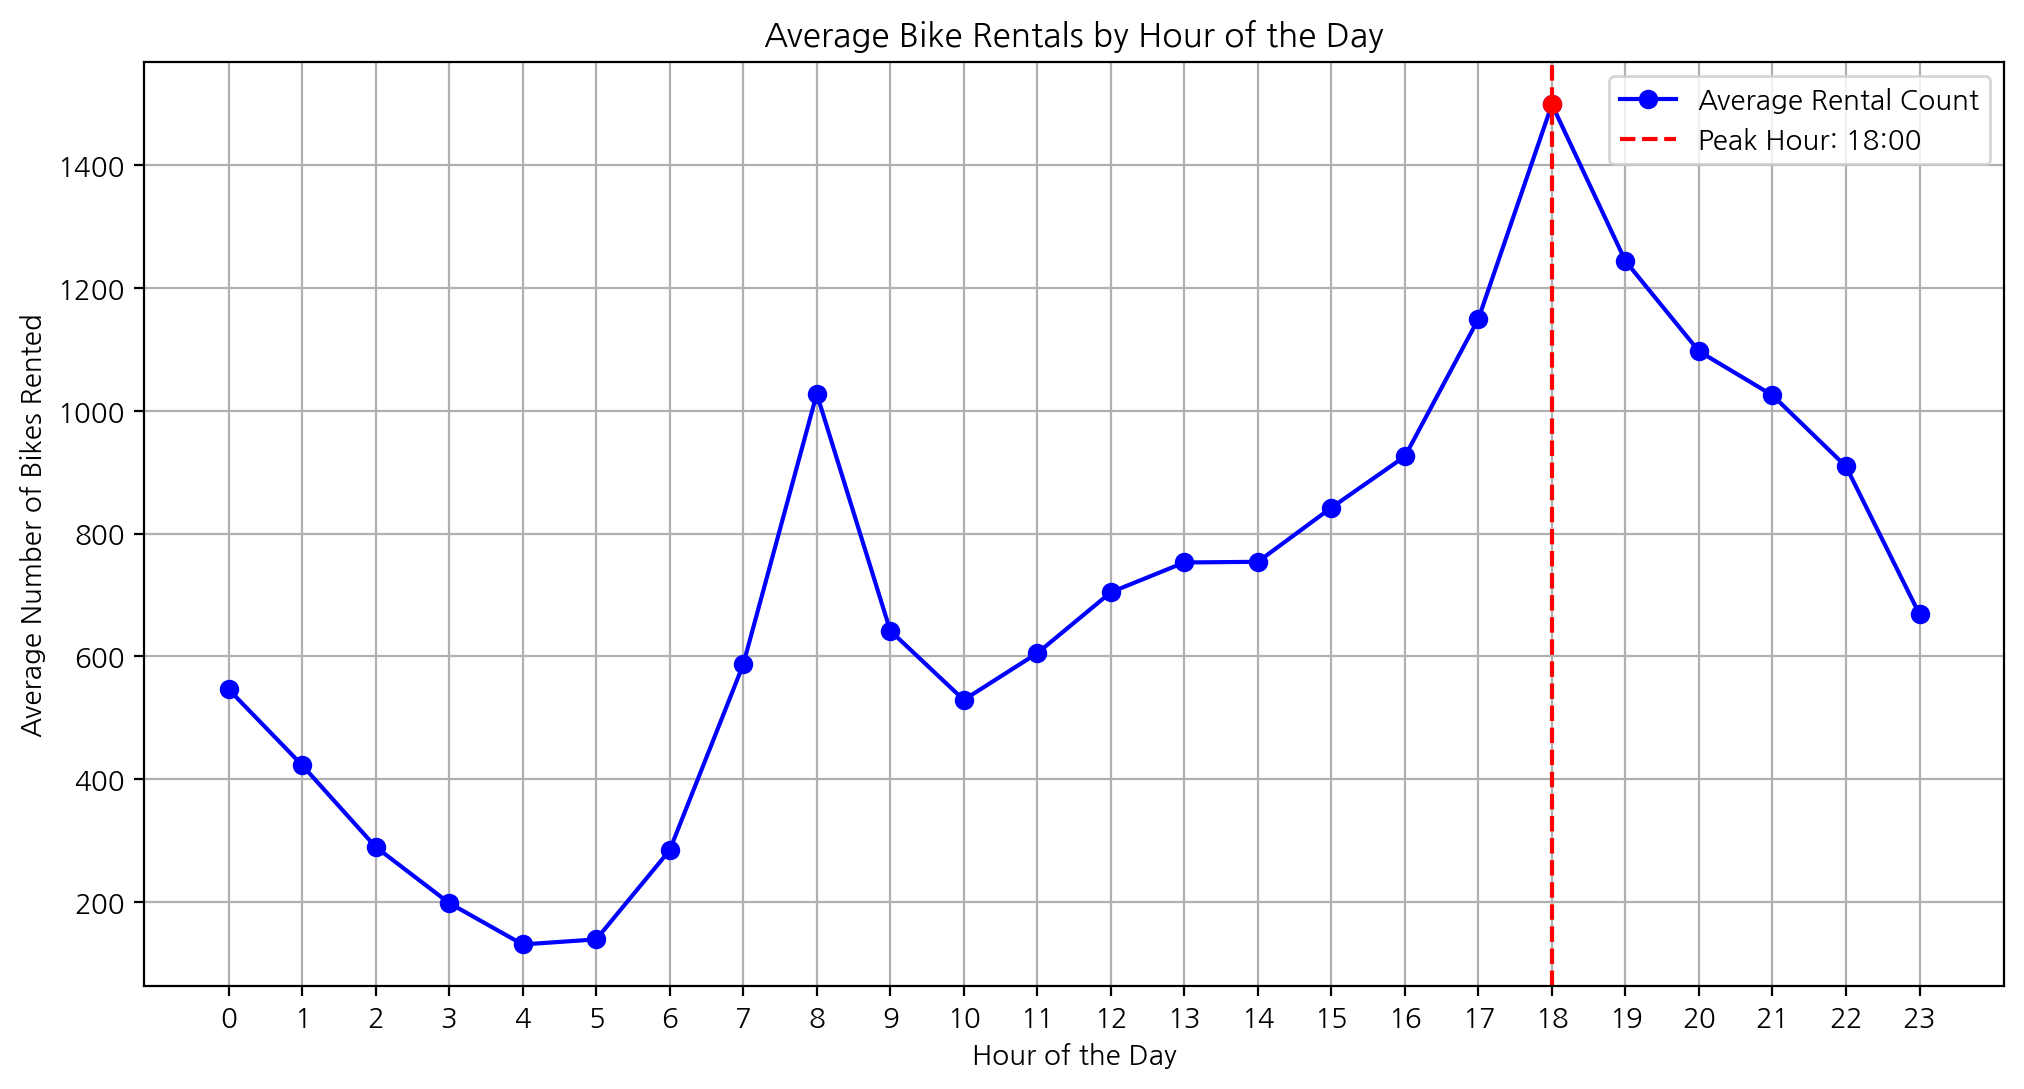

In [146]:
# 시간별 자전거 대여량 시각화
plt.figure(figsize=(12, 6))

# 라인 그래프 그리기
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o', linestyle='-', color='b', label='Average Rental Count')

# 피크 시간 강조
plt.axvline(x=peak_hour, color='r', linestyle='--', label=f'Peak Hour: {peak_hour}:00')
plt.scatter(peak_hour, peak_hour_value, color='r', zorder=5)

# 그래프 제목 및 레이블
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bikes Rented')
plt.legend()
plt.grid(True)

plt.xticks(range(0, 24))  # x축에 시간 단위 표시
plt.show()


평균적으로 18시에 대여량이 많다.

이는 퇴근 후 자전거를 이용하거나, 단순히 저녁에 날씨가 좋기 때문일 수 있다.

이유를 알아보기 위해 휴일만 필터링하여 시간대별 대여량을 체크해본다.

In [147]:
# 휴일만 필터링
df_holidays = df[df['Holiday'] == 'Holiday']


In [148]:
# 시간별 자전거 대여량 평균 계산 (휴일만 사용)
hourly_rentals_holidays = df_holidays.groupby('Hour')['Rented Bike Count'].mean()

# 피크 시간 계산 (휴일만)
peak_hour_holidays = hourly_rentals_holidays.idxmax()
peak_hour_value_holidays = hourly_rentals_holidays.max()

print(f"휴일 중 피크 시간: {peak_hour_holidays}:00, 피크 대여량: {peak_hour_value_holidays}")


휴일 중 피크 시간: 15:00, 피크 대여량: 812.625


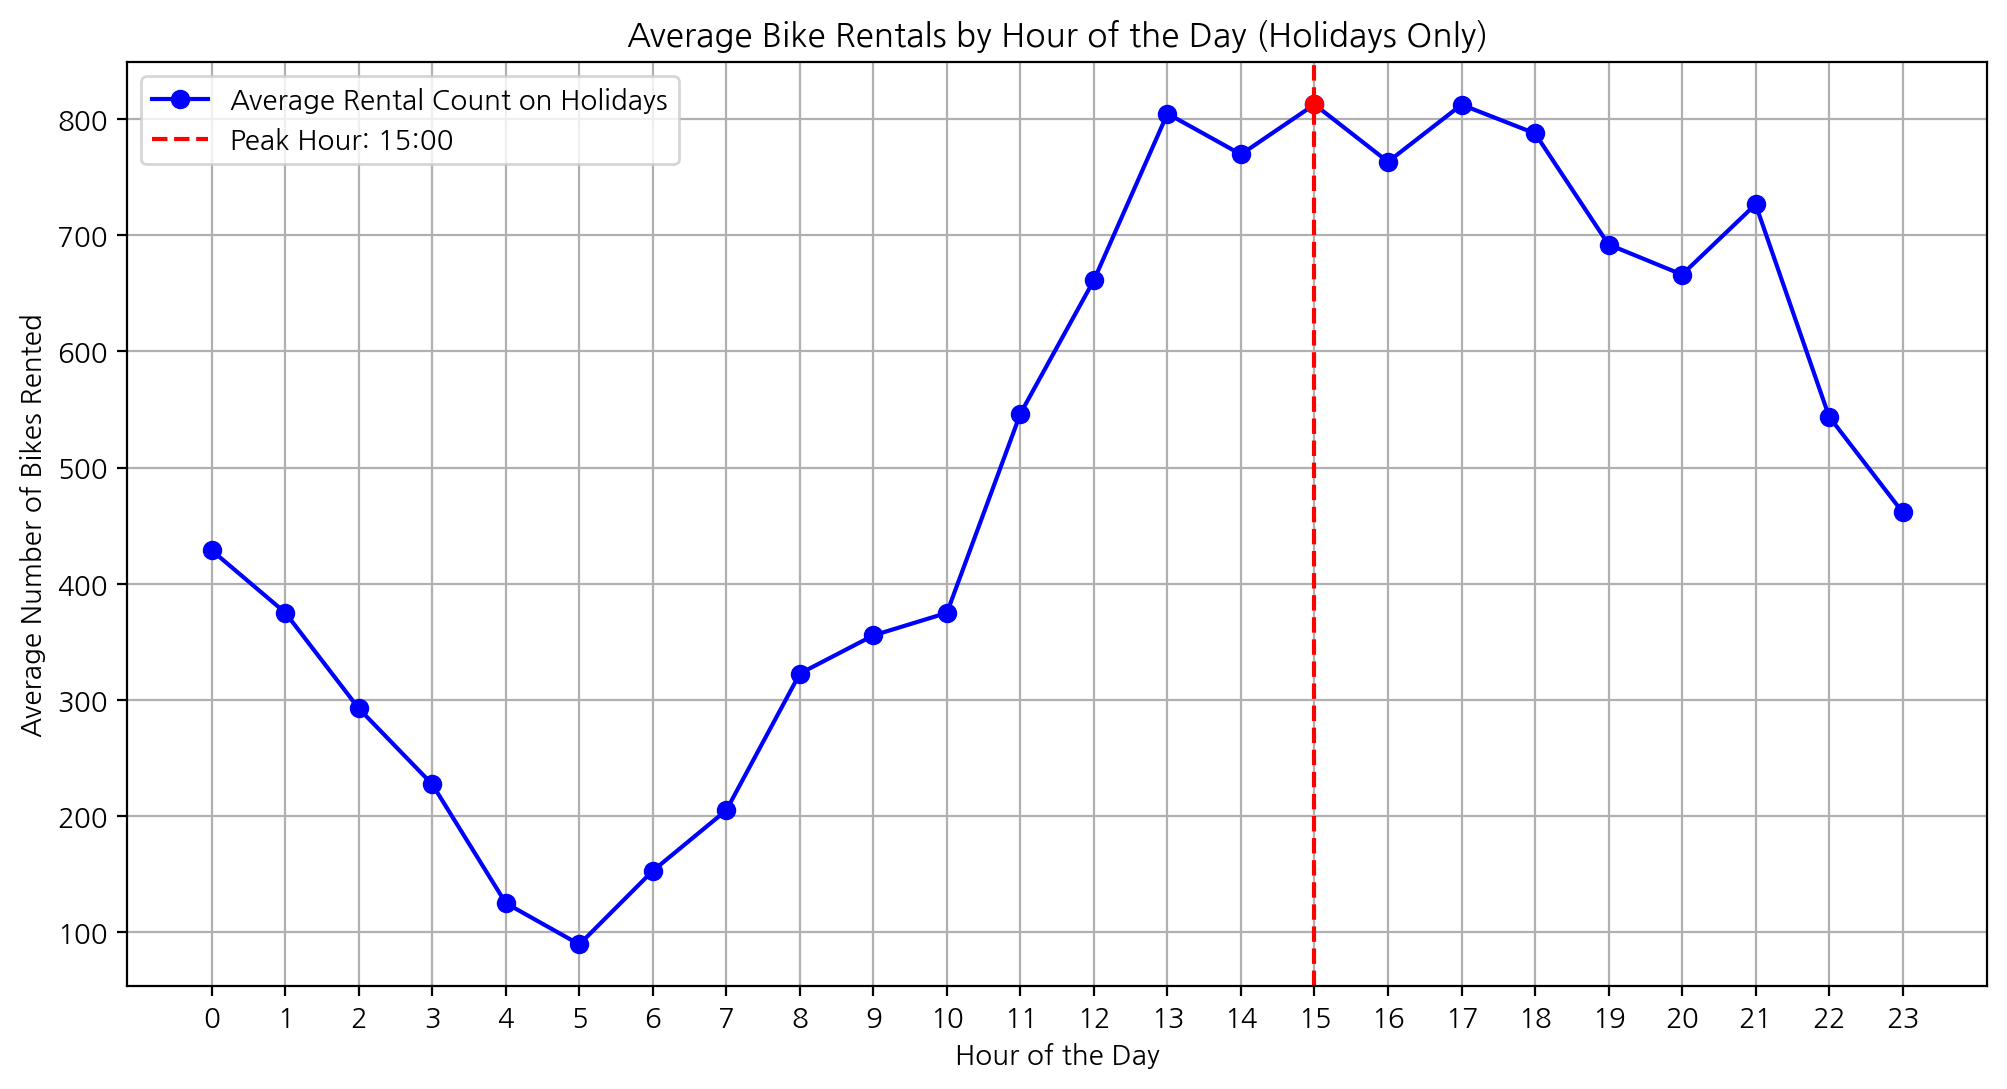

In [149]:
import matplotlib.pyplot as plt

# 시간별 자전거 대여량 시각화 (휴일만)
plt.figure(figsize=(12, 6))

# 라인 그래프 그리기
plt.plot(hourly_rentals_holidays.index, hourly_rentals_holidays.values, marker='o', linestyle='-', color='b', label='Average Rental Count on Holidays')

# 피크 시간 강조
plt.axvline(x=peak_hour_holidays, color='r', linestyle='--', label=f'Peak Hour: {peak_hour_holidays}:00')
plt.scatter(peak_hour_holidays, peak_hour_value_holidays, color='r', zorder=5)

# 그래프 제목 및 레이블
plt.title('Average Bike Rentals by Hour of the Day (Holidays Only)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bikes Rented')
plt.legend()
plt.grid(True)

plt.xticks(range(0, 24))  # x축에 시간 단위 표시
plt.show()


휴일만 보았을 때에는 15시에 대여량이 가장 많다.

전체 평균과는 달리 오후 시간대에서 비슷한 정도의 높은 대여량을 보여준다.

이것으로 보았을때, 전체 평균에서 18시가 피크인 이유는 저녁이 날씨가 좋아서 보다는 해당 시간대에 이용하는 사람이 대여자의 주를 이루기 때문이다.

따라서 대여자의 연령대는 직장인, 또는 고등학생 정도로 예상된다. 